* This notebook was made to explore the surface currents of model response spatially and temporally by releasing particles within t=+-30min, l+-1km.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import datetime as dt
import pytz, datetime
import scipy.io
import arrow
import os
from salishsea_tools import nc_tools, viz_tools, tidetools, stormtools, bathy_tools
from matplotlib import reload
from __future__ import division
import drifter

In [2]:
grid = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc','r')
bathy, X, Y = tidetools.get_bathy_data(grid)
lats = grid.variables['nav_lat']
lons = grid.variables['nav_lon']
bath = grid.variables['Bathymetry']

In [3]:
tracersT = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/oct8_10RFdailySmoo/\
SalishSea_1h_20141008_20141010_grid_T.nc')
ssh = tracersT.variables['sossheig']
timesteps = tracersT.variables['time_counter']

In [4]:
def plotoct_mewold(lon,lat,key,drifter = 'a'):
    fig, axs = plt.subplots(3, 3, figsize=(15, 12))
    for i in np.arange(3):
        for ax in axs[i,:]:
            viz_tools.plot_coastline(ax,grid,coords='map')
            viz_tools.plot_coastline(ax,grid,coords='map',isobath=4,color='FireBrick')
            viz_tools.plot_coastline(ax,grid,coords='map',isobath=20,color='OrangeRed')
            ax.set_xlim([-123.6,-123])
            ax.set_ylim([48.8,49.4])
            ax.set_xticks([-123.6, -123.4, -123.2,-123])
            ax.set_xticklabels([-123.6, -123.4, -123.2,-123])
            ax.set_xlabel('Longitude')
            ax.set_ylabel('Latitude')   
    colors=['g','DodgerBlue','tomato']
    t = ['-30min','0','30min'];
    part = 0
    for i in np.arange(3):
        for j in np.arange(3):
            if drifter =='a':
                axs[i,j].scatter(lon[key][0,part],lat[key][0,part],color='0.30',marker='s')
                axs[i,j].scatter(lon[key][1:,part],lat[key][1:,part],marker='o',color=colors[0],label=t[0])
                axs[i,j].scatter(lon[key][0,part+9],lat[key][0,part+9],color='0.30',marker='s')
                axs[i,j].scatter(lon[key][1:,part+9],lat[key][1:,part+9],marker='o',color=colors[1],label=t[1])
                axs[i,j].scatter(lon[key][0,part+18],lat[key][0,part+18],color='0.30',marker='s')
                axs[i,j].scatter(lon[key][1:,part+18],lat[key][1:,part+18],marker='o',color=colors[2],label=t[2]) 
                axs[i,j].legend(loc='best')
                part = part +1
    return fig

In [5]:
drifters = scipy.io.loadmat('/ocean/mhalvers/research/drifters/SoG_drifters.mat',squeeze_me=True)
ubc = drifters['ubc']

In [6]:
drop = 'drop1/12'
runs=['RFseries','reduvisseries']
base='/ocean/jieliu/research/meopar/Ariane/result/'
file_pattern = 'ariane_trajectories_qualitative.nc'
lon112 = {}; lat112={}
for run in runs:
    path = os.path.join(base,run, drop,file_pattern)
    f = nc.Dataset(path,'r');
    lon112[run] = f.variables['traj_lon']
    lat112[run] = f.variables['traj_lat']

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


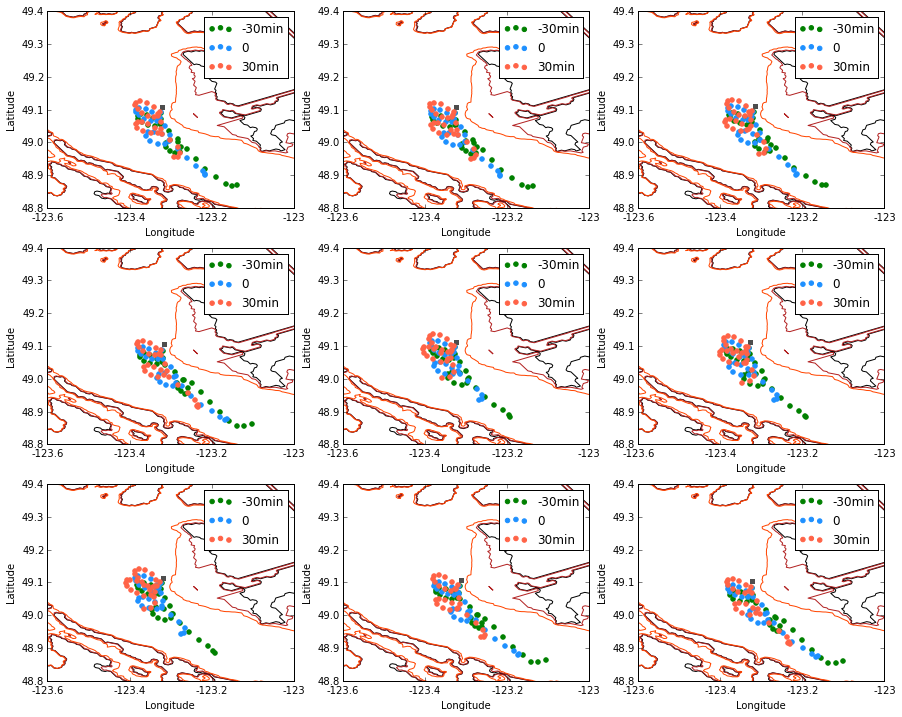

In [7]:
fig = plotoct_mewold(lon112,lat112,'RFseries',drifter='a')

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


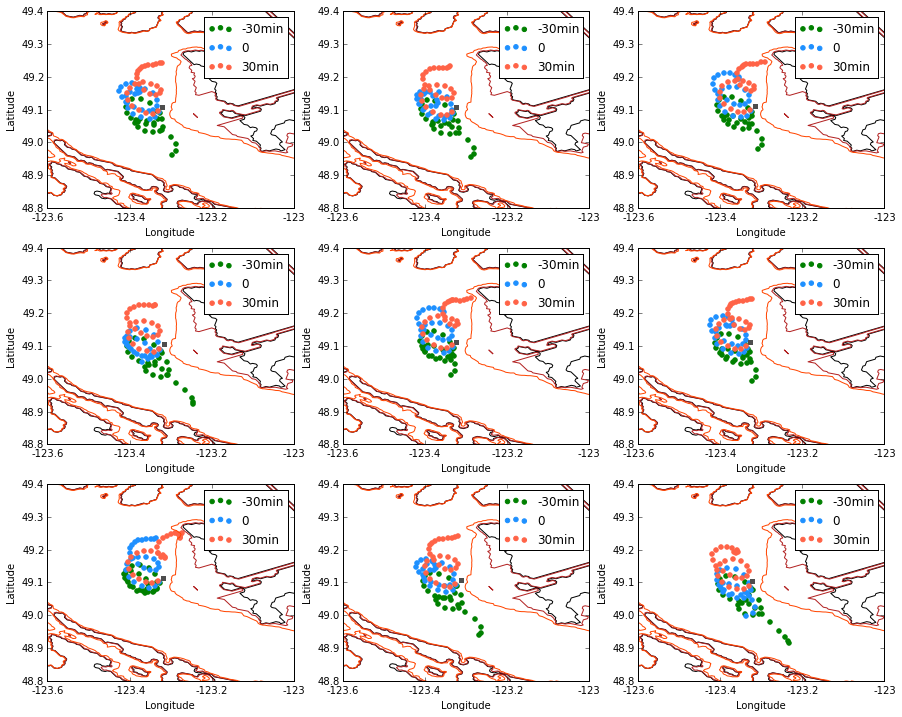

In [8]:
fig = plotoct_mewold(lon112,lat112,'reduvisseries',drifter='a')